In [2]:
import os
import numpy as np
from time import time

import librosa
import librosa.display
from scipy.io.wavfile import write

import matplotlib.pyplot as plt

np.set_printoptions(precision=2)

# stft specs
win_length = 1024
n_fft = 1024
hop_length = 768
target_sr = 8192


In [5]:
X = np.load('../data.nosync/raw/unet_inputs_raw.npy')
Y = np.load('../data.nosync/raw/unet_targets_raw.npy')

print(X.shape, Y.shape)

(1963, 98303) (1963, 98303)


In [6]:
inputs = []
targets = []

for i in range(X.shape[0]):

    X_spec = np.abs(librosa.stft(X[i], win_length=win_length, n_fft=n_fft, hop_length=hop_length))
    Y_spec = np.abs(librosa.stft(Y[i], win_length=win_length, n_fft=n_fft, hop_length=hop_length))

    inputs.append(X_spec[:512])
    targets.append(Y_spec[:512])

inputs = np.array(inputs) 
targets = np.array(targets)

print(inputs.shape, targets.shape)

(1963, 512, 128) (1963, 512, 128)


In [14]:
np.save('unet_inputs_spec.npy', inputs)
np.save('unet_targets_spec.npy', targets)

In [7]:
print(np.min(inputs), np.max(inputs))

0.0 127.04355233726281


In [11]:
def show_spectrograms(S_input, S_target, S_pred):
    
    D1 = librosa.amplitude_to_db(S_input)
    D2 = librosa.amplitude_to_db(S_target)
    D3 = librosa.amplitude_to_db(S_pred)
    
    plt.figure()
    ax1 = plt.subplot(3,1,1)
    librosa.display.specshow(D1)
    plt.title('Input')
    plt.colorbar(format='%+2.0f dB')

    ax2 = plt.subplot(3,1,2)
    librosa.display.specshow(D2)
    plt.title('Target')
    plt.colorbar(format='%+2.0f dB')
    
    ax3 = plt.subplot(3,1,3)
    librosa.display.specshow(D3)
    plt.title('Prediction')
    plt.colorbar(format='%+2.0f dB')

    plt.tight_layout()
    plt.show()

def spectrogram_to_wavfile(filename, S):
    S = librosa.core.db_to_power(S)
    print('Inverting spectrogram...')
    y = librosa.feature.inverse.mel_to_audio(S)
    print('Creating {}...'.format(filename))
    scipy.io.wavfile.write(filename, 22050, y)
    print('Done')

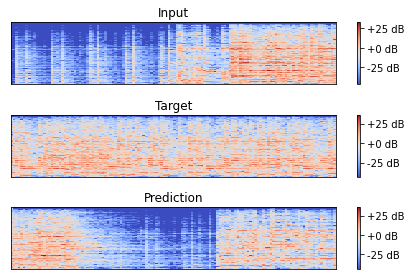

In [13]:
show_spectrograms(inputs[0], inputs[1], inputs[2])